# MNIST

# 0~9 손글씨 숫자 인식 프로그램이에요

1.  이번엔 모델을 먼저 만들어보아요

  히든 레이어가 2개 출력 레이어가 1개 있는 구조입니다.
    
  각 레이어에는 순서대로 세포가 100개, 50개, 10개가 있습니다.
  
  activation 이란 레이어의 출력에 특정한 규칙을 지정하는것인데요
  
  relu는 출력값이 음수일 경우 0으로 바꾸어서 음수를 필터링 합니다.
  
  softmax는 exp(출력부분값)/exp(출력전체값) 으로 바꾸어 
  
  각 출력은 0~1 사이의 값을 가지며 전체합은 1이 되어서 출력이 확률처럼 보이게 만드는 기법입니다

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,), name='hidden_1'))
model.add(Dense(50, activation='relu', name='hidden_2'))
model.add(Dense(10, activation='softmax', name='output'))
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.summary()


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 100)               78500     
_________________________________________________________________
hidden_2 (Dense)             (None, 50)                5050      
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


2. MNIST 라는 데이터셋을 인터넷을 통해 받아옵니다

  x는 이미지로 이미지개수 *  28 x 28 x 1 = 784 크기의 해상도(배열)를 가집니다
  
  각 이미지 픽셀은 0~255 까지의 값을 가질 수 있는데 값이 커도 문제가 안되지만 
  
  네트워크가 고장나는 경우가 있어  0~1 사이로 맞추어서 안전하게 가도록 합니다
  
  y는 정답으로 각 이미지마다 0~9 까지의 숫자값을 가집니다
  
  카테고리컬 이라는 함수를 이용해서 각 숫자를 배열로 만들어줍니다
  
  ex) y가 2 였다면 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 가 됩니다
  
  
  

In [0]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

(x, y), (x_test, y_test) = datasets.mnist.load_data()
x = x.reshape(-1, 784) / 255
x_test = x.reshape(-1, 784) / 255
y = np_utils.to_categorical(y)
y_test = np_utils.to_categorical(y_test)


11493376/11490434 [==============================] - 0s 0us/step


3. 학습을 시켜보죠

  epochs 는 전체 데이터셋을 몇바퀴 돌지 설정하는 부분입니다
  
  batch_size 는 한번 학습할 이미지 개수입니다.
  
  validation_split 은 0.1 * 100 % 만큼 학습에 사용하지 않고 검증 용도로 데이터를 사용합니다

In [0]:
history = model.fit(x, y, epochs=10, batch_size=54000, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0097 - acc: 0.9976 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0096 - acc: 0.9976 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 3/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.0096 - acc: 0.9976 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 4/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.0096 - acc: 0.9976 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 5/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.0096 - acc: 0.9976 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 6/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.0095 - acc: 0.9976 - val_loss: 0.0841 - val_acc: 0.9800
Epoch 7/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.0095 - acc: 0.9976 - val_loss: 0.0841 - val_acc:

4. 잘 학습이 됬는지 예측한 결과와 이미지를 직접 비교해봅니다

예측값: 0


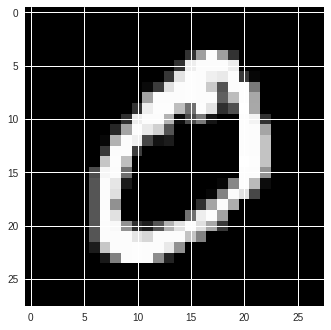

In [0]:
import matplotlib.pyplot as plt

index = 1
x_show = x.reshape(-1, 28, 28)
predict = model.predict(x)
print('예측값:', np.argmax(predict[index]))
plt.imshow(x_show[index], cmap='gray')
plt.show()
